In [247]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle
from matplotlib import gridspec
from matplotlib.lines import Line2D
import scipy.stats
from io import StringIO

In [264]:
def plot_scan(all_results, labels, rows=3, cols=4):
    fig = plt.figure(figsize=(15, 7))
    colors = sns.color_palette("colorblind", 5)
    gs = gridspec.GridSpec(rows, cols, hspace=0.3)
    for i, (results, label) in enumerate(zip(all_results, labels)):
        gs_spec = gs[i // cols, i % cols]

        gs2 = gridspec.GridSpecFromSubplotSpec(2, 1, gs_spec, height_ratios=[3, 1], hspace=0.3)
        ax = fig.add_subplot(gs2[0])
        ax2 = fig.add_subplot(gs2[1])
        
        for result in results:
            ax.plot(result["is_infectious"], color=colors[0])
            ax.plot(result["is_recovered"], color=colors[1])
            ax.plot(result["is_quarantined"], color=colors[2])
            ax.plot(result["is_index_case"], color=colors[3])
            #ax.plot(result["tests_today"], color=colors[4])
            ax2.plot(result["Re"], color="k", alpha=0.3)

        ax2.set_xlabel("Time [days]")
        ax.set_title(label)
        ax.set_ylim(1, 1E5)
        ax.set_xlim(0, 500)
        ax.set_yscale("log")

        ax2.set_xlim(0, 500)
        ax2.set_ylim(0, 4)
        ax2.set_ylabel("$R_e$")
        ax2.axhline(1, color="r", lw=2)

    labels = ["Infected", "Recovered", "Quarantined", "Index Cases", "Tests Today"]
    proxies = [Line2D([], [], color=color) for color in colors]
    fig.legend(proxies, labels, loc="upper center", ncol=4)
    return fig

In [270]:
data["app_frac"].unique()

array([0.  , 0.6 , 0.75, 1.  ])

In [268]:
data = pd.read_pickle("/scratch4/chaack/software/scripts/contagion/examples/run11.pickle")
mask = (data["app_frac"] == 0.6) & (data["rnd_test_prob"] == 0) & (data["sd_scaling"] == 1) & (data["symp_prob"] == 0.6) & (data["tracing_eff"] == 0.5) & (data["n_persons"] == 1E6)

for groupn, group in data[mask].groupby("config"):
    plot_scan([group["stats"].iloc[0]], [""], 1, 1)
    


3

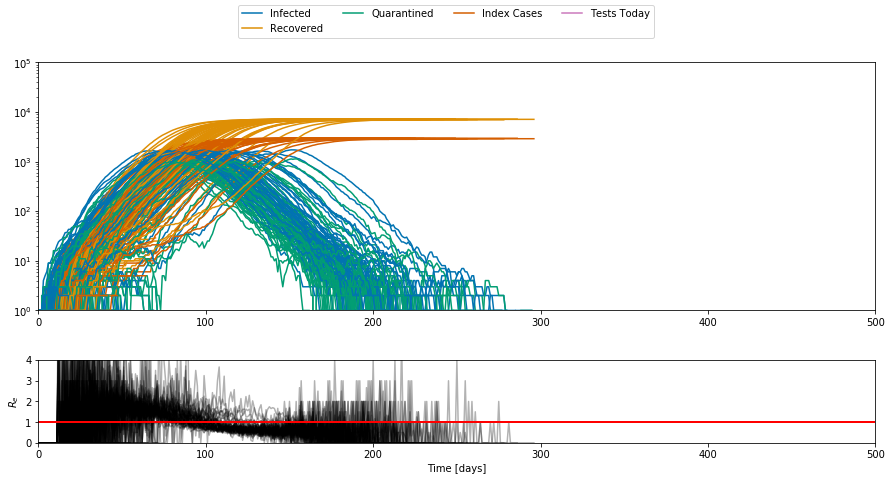

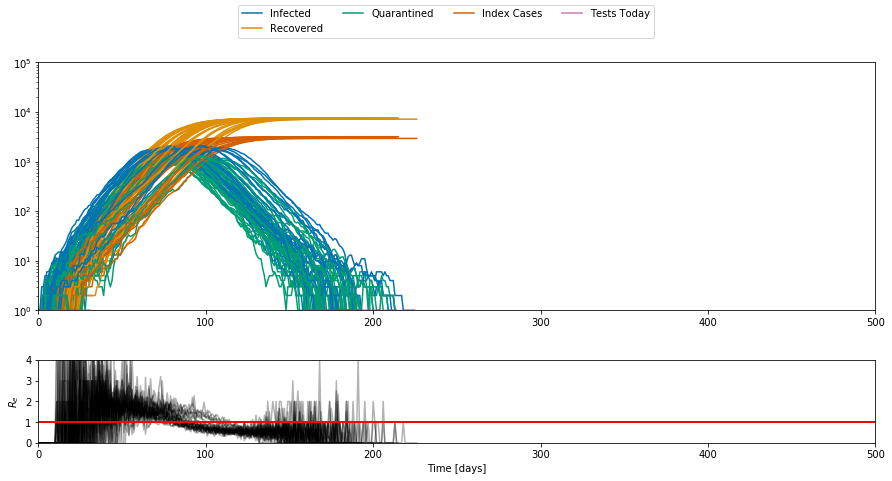

In [246]:
data = pd.read_pickle("/scratch4/chaack/data/contagion/runs/13/config_0_0.pickle")
results = data["results"]

fig = plot_scan([[res[0] for res in results]], [""], 1, 1)
fig.savefig("bm3_lat_inf_before_infec.png", dpi=150)
data = pd.read_pickle("bm3.pickle")
results = data["results"]
fig = plot_scan([[res[0] for res in results]], [""], 1, 1)
fig.savefig("bm3.png", dpi=150)
    



In [243]:
inf_pat0 = []

for res in results:
    inf_hist = res[1]
    
    if len(inf_hist) == 0:
        inf_pat0.append(0)
        continue
        
    pat0 = inf_hist[0][0]
    inf_pat0.append(len(np.nonzero(inf_hist[:, 0] == pat0)[0]))
np.average(inf_pat0)

2.92

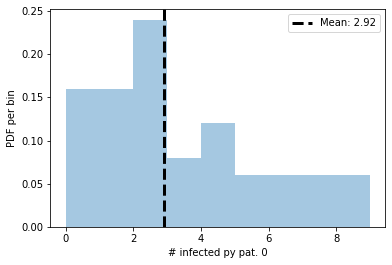

In [244]:
sns.distplot(inf_pat0, bins=np.arange(10), kde=False, norm_hist=True)
plt.axvline(np.average(inf_pat0), color="k", ls="--", lw=3, label="Mean: {:.2f}".format(np.average(inf_pat0)))
plt.xlabel("# infected py pat. 0")
plt.ylabel("PDF per bin")
plt.legend()

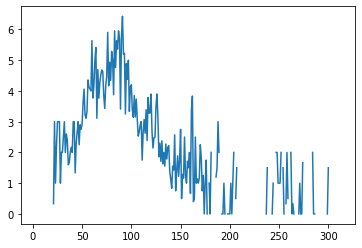

In [206]:
plt.plot(results[0][0]["num_traced_infected"] / results[0][0]["num_reported"])


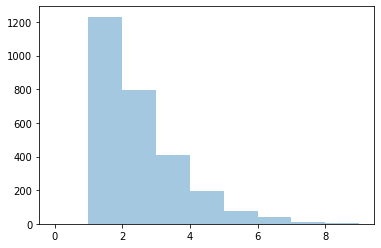

In [204]:
sns.distplot(np.unique(results[0][1][:, 0], return_counts=True)[1], bins=np.arange(10), kde=False)

In [196]:
(results[5][0]["is_hospitalized"] > 0).sum()

0

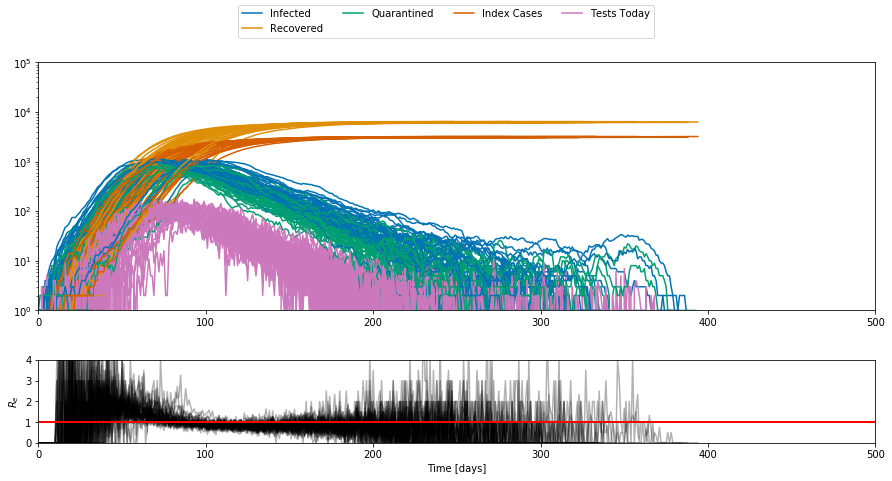

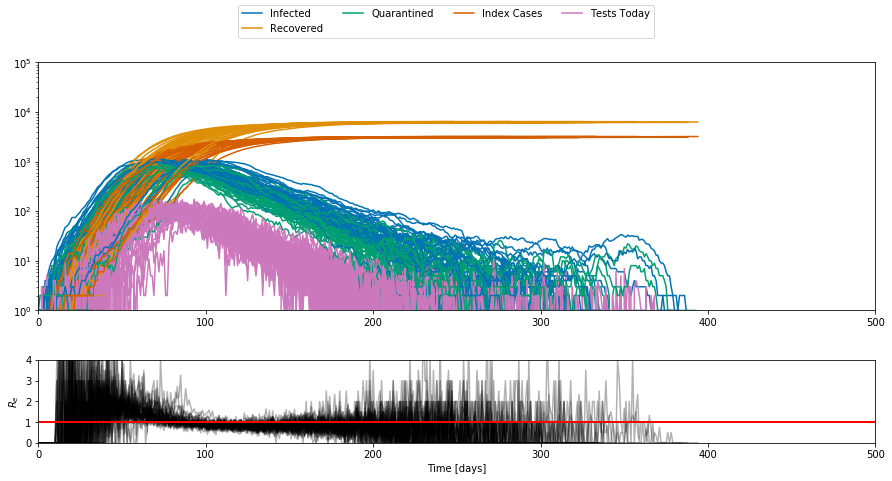

In [113]:
data_no_intv = pd.read_pickle("no_intv.pickle")
data_no_intv_new = pd.read_pickle("no_intv_new.pickle")
data_no_intv_powerlaw = pd.read_pickle("no_intv_powerlaw.pickle")

In [82]:
inf_hist = data_no_intv["results"][0][1]
contactee, contacts = inf_hist.T#
contactee_uq = np.sort(np.unique(contactee))
inf_per_ctc, _, _ = scipy.stats.binned_statistic(contactee, contacts!=-1, bins=np.arange(100001), statistic="sum")
inf_per_ctc = inf_per_ctc[contactee_uq]


inf_hist = data_no_intv_powerlaw["results"][0][1]
contactee, contacts = inf_hist.T
contactee_uq = np.sort(np.unique(contactee))
inf_per_ctc_pl, _, _ = scipy.stats.binned_statistic(contactee, contacts!=-1, bins=np.arange(100001), statistic="sum")
inf_per_ctc_pl = inf_per_ctc_pl[contactee_uq]


Text(0, 0.5, 'Probability per Bin')

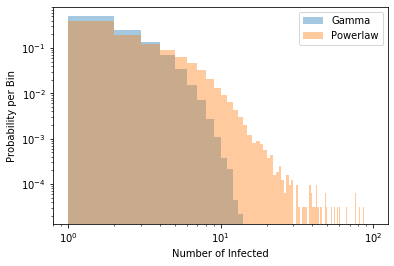

In [86]:
sns.distplot(inf_per_ctc, bins=np.arange(0, 100), kde=False, norm_hist=True, label="Gamma")
sns.distplot(inf_per_ctc_pl, bins=np.arange(0, 100), kde=False, norm_hist=True, label="Powerlaw")
plt.loglog()
plt.legend()
plt.xlabel("Number of Infected")
plt.ylabel("Probability per Bin")

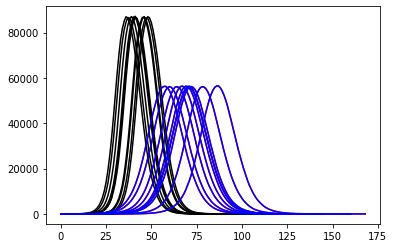

In [114]:
for res in data_no_intv["results"]:
    plt.plot(res[0]["is_infected"], color="r")
    
for res in data_no_intv_powerlaw["results"]:
    plt.plot(res[0]["is_infected"], color="k")
    
for res in data_no_intv_new["results"]:
    plt.plot(res[0]["is_infected"], color="b")
#plt.plot(data_no_intv_powerlaw["results"][0][0]["Re"])

In [102]:
data_no_intv["results"][0][0][".columns"]

Index(['contacts', 'contacts_per_person', 'is_removed', 'is_latent',
       'is_infectious', 'is_infected', 'was_infected', 'is_hospitalized',
       'is_recovered', 'is_recovering', 'is_dead', 'is_quarantined',
       'is_symptomatic', 'is_tested', 'is_tested_positive',
       'is_tested_negative', 'is_tested_positive_second',
       'is_tested_negative_second', 'is_index_case', 'is_reported',
       'is_recovered_is_tested_positive_True',
       'is_recovered_is_index_case_True', 'was_infected_is_index_case_False',
       'Re'],
      dtype='object')

In [42]:
print(np.average(counts))
print(np.average(counts_pl))

1.9817400644468313
3.0456616758114015


In [95]:
csv = """# Number of infectees, uniform nc=6, uniform nc=10, social structure nc=10, uniform nc=14 
0, 0.07798, 0.06929, 0.07763, 0.07115
1, 0.1859, 0.1707, 0.19366, 0.17351
2, 0.23054, 0.21755, 0.24152, 0.22408
3, 0.20167, 0.20333, 0.20208, 0.20205
4, 0.14282, 0.14924, 0.13767, 0.14861
5, 0.08463, 0.09521, 0.07624, 0.09039
6, 0.04317, 0.05059, 0.03977, 0.04791
7, 0.01963, 0.02483, 0.01826, 0.02355
8, 0.00834, 0.01157, 0.00788, 0.01121
9, 0.00336, 0.00463, 0.00321, 0.00481
10, 0.00121, 0.00202, 0.00125, 0.00183
11, 0.00047, 0.00068, 0.00048, 0.00056
12, 0.00017, 0.0002, 0.00025, 0.00017
13, 7e-05, 7e-05, 6e-05, 9e-05
14, 4e-05, 5e-05, 3e-05, 6e-05
15, 0, 1e-05, 1e-05, 1e-05
16, 0, 1e-05, 0, 1e-05
17, 0, 1e-05, 0, 0
18, 0, 1e-05, 0, 0
19, 0, 0, 0, 0
20, 0, 0, 0, 0
21, 0, 0, 0, 0
22, 0, 0, 0, 0
23, 0, 0, 0, 0
24, 0, 0, 0, 0
25, 0, 0, 0, 0
26, 0, 0, 0, 0
27, 0, 0, 0, 0
"""

tina_output = pd.read_csv(StringIO(csv))

Text(0, 0.5, 'Probability per Bin')

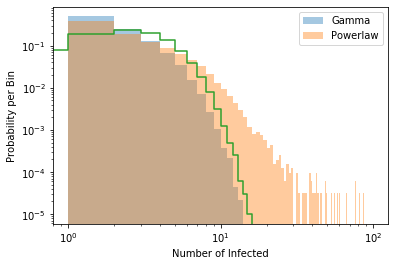

In [96]:
sns.distplot(inf_per_ctc, bins=np.arange(0, 100), kde=False, norm_hist=True, label="Gamma")
sns.distplot(inf_per_ctc_pl, bins=np.arange(0, 100), kde=False, norm_hist=True, label="Powerlaw")
plt.step(np.arange(28), tina_output[" social structure nc=10"], where="post")
plt.loglog()
plt.legend()
plt.xlabel("Number of Infected")
plt.ylabel("Probability per Bin")

In [93]:
tina_output

,# Number of infectees,uniform nc=6,uniform nc=10,social structure nc=10,uniform nc=14
0,-1,0.00000,0.00000,0.00000,0.00000
1,0,0.07798,0.06929,0.07763,0.07115
2,1,0.18590,0.17070,0.19366,0.17351
3,2,0.23054,0.21755,0.24152,0.22408
4,3,0.20167,0.20333,0.20208,0.20205
5,4,0.14282,0.14924,0.13767,0.14861
6,5,0.08463,0.09521,0.07624,0.09039
7,6,0.04317,0.05059,0.03977,0.04791
8,7,0.01963,0.02483,0.01826,0.02355
9,8,0.00834,0.01157,0.00788,0.01121
